In [30]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = 'c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family = font_name)
import pandas as pd
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

상호작용과 다항식

이전 포스팅의 문제에서 선형모델은 wave데이터셋의 각 구간에 대해 상숫값을 학습했다.

그런데 선형 모델은 이러한 상수값 뿐만 아니라 기울기도 학습할 수 있다.
선형 모델에 기울기를 추가하는 방법은 구간으로 분할된 데이터에 원래 특성을 다시 추가하는 것이다.

In [31]:
import numpy as np
X_combined=np.hstack([X,X_binned])
print(X_combined.shape)

(100, 11)


In [1]:
import mglearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

# 데이터셋 가져오기
X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

bins = np.linspace(-3, 3, 11)
which_bin = np.digitize(X, bins=bins)

# 변환을 위해 OneHotEncoder를 사용합니다
encoder = OneHotEncoder(sparse=False)

# encoder.fit은 which_bin에 나타난 유일한 값을 찾습니다
encoder.fit(which_bin)

# 원-핫-인코딩으로 변환합니다
X_binned = encoder.transform(which_bin)

line_binned = encoder.transform(np.digitize(line, bins=bins))
X_combined = np.hstack([X, X_binned])

reg = LinearRegression().fit(X_combined, y)

line_combined = np.hstack([line, line_binned])

plt.plot(line, reg.predict(line_combined), label='linear Reg added original attr')

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k', linewidth=1)

plt.legend(loc="best")
plt.xlabel("regressor output")
plt.ylabel("input attr")
plt.plot(X[:, 0], y, 'o', c='k')

In C:\Users\A\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\A\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\A\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\A\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\A\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


이 예에서 이 모델은 각 구간의 절편과 기울기를 학습했다.

학습된 기울기는 음수이고 모든 구간에 걸쳐 동일하다.
즉 x축 특성이 하나이므로 기울기도 하나이다.

기울기가 모든 구간에서 같으니 별로 유익해 보이지 않는다.
오히려 각 구간에서 다른 기울기를 가지는게 좋다.

이런 효과를 위해서 데이터 포인트가 있는 구간과 x축 사이의 상호작용 특성을 추가할 수 있다.
이 특성이 구간 특성과 원본 특성의 곱이다.

In [33]:
#포인트가 속한 구간*원본 특성
X_product = np.hstack([X_binned, X * X_binned])
print(X_product.shape)

(100, 20)


C:\Users\A\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\A\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


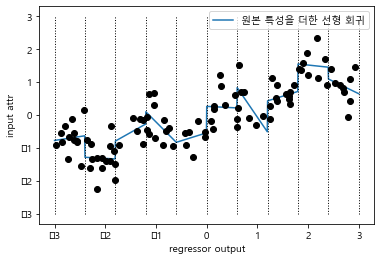

In [34]:
line_combined = np.hstack([line, line_binned])
X_product = np.hstack([X_binned, X * X_binned])

reg = LinearRegression().fit(X_product, y)

line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label='원본 특성을 더한 선형 회귀')

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k', linewidth=1)

plt.xlabel("regressor output")
plt.ylabel("input attr")
plt.plot(X[:, 0], y, 'o', c='k')
plt.legend(loc="best")

각 구간에서 절편과 기울기가 모두 다르다.

구간 나누기는 연속형 특성을 확장하는 방법중 하나이다.


원본 특성의 다항식을 추가하는 방법도 있다.

특성 x가 주어지면 X**2, X**3 등을 시도해 볼 수 있다.
이 방식이 preprocessing모듈의 PolynomialFeatures에 구현되어 있다.

In [35]:
#다항식 추가
from sklearn.preprocessing import PolynomialFeatures
# x ** 10까지 고차항을 추가합니다
# 기본값인 "include_bias=True"는 절편에 해당하는 1인 특성을 추가합니다
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

In [36]:
print("X_poly.shape: {}".format(X_poly.shape))
# 10차원을 사용했으므로, 10개의 특성이 만들어진다.

X_poly.shape: (100, 10)


In [37]:
# X와 X_poly의 값을 비교
print("X 원소:\n{}".format(X[:5]))
print("X_poly 원소:\n{}".format(X_poly[:5]))

X 원소:
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
X_poly 원소:
[[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]


In [38]:
# 각 특성의 차수를 알려주는 get_feature_names 메서드를 사용해 특성의 의미를 알 수 있다.
print("항 이름:\n{}".format(poly.get_feature_names()))

항 이름:
['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


X_poly의 첫 번째 열은 X와 같고 다른 열은 첫 번째 열의 거듭 제곱이다.
그래서 어떤 값은 매우 크게 나오는 것을 볼 수 있다.

두번째 행은 다른 값보다 월등하게 크다.

다항식 특성을 선형 보델과 함께 사용하면 전형적인 다항 회귀 모델이 된다.

C:\Users\A\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\A\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


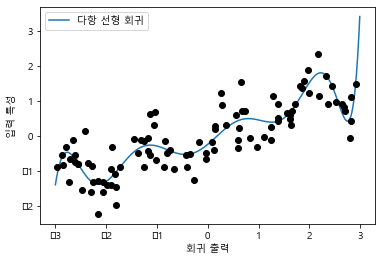

In [39]:
reg = LinearRegression().fit(X_poly, y)
line_poly = poly.transform(line)

plt.plot(line, reg.predict(line_poly), label='다항 선형 회귀')
plt.plot(X[:, 0], y, 'o', c='k')
plt.xlabel("회귀 출력")
plt.ylabel("입력 특성")
plt.legend(loc="best")
plt.show()

다항식 특성은 1차원 데이터셋에서도 매우 부드러운 곡선을 만든다.
그러나 고차원 다항식은 데이터가 부족한 영역에서 민감하게 동작한다.

C:\Users\A\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\A\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


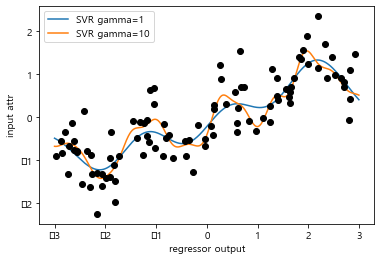

In [40]:
from sklearn.svm import SVR
for gamma in [1, 10]:

    svr = SVR(gamma=gamma).fit(X, y)

    plt.plot(line, svr.predict(line), label='SVR gamma={}'.format(gamma))

plt.plot(X[:, 0], y, 'o', c='k')
plt.xlabel("regressor output")
plt.ylabel("input attr")
plt.legend(loc="best")
plt.show()

더 복잡한 모델인 터널 SVM을 사용해 특성 데이터를 변환하지 않고 
다항 회귀와 비슷한 복잡도를 가진 예측을 만들었다.

In [48]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)

# 데이터 스케일 조정
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [49]:
#degree=2로하면 원본 특성에서 두 개를 뽑아 만들 수 있는 모든 곱을 얻을 수 있다.
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_poly.shape: {}".format(X_train_poly.shape))
# X_train.shape: (379, 13)
# X_train_poly.shape: (379, 105)

X_train.shape: (379, 13)
X_train_poly.shape: (379, 105)


이 데이터는 원래 13개의 특성인데 105개의 교차 특성으로 확장되었다.

즉, degree=2로하면 원본 특성에서 두 개를 뽑아 만들 수 있는 모든 곱을 얻을 수 있다.

In [50]:
print("다항 특성 이름:\n{}".format(poly.get_feature_names()))

다항 특성 이름:
['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


In [51]:
#상호작용이 특성이 있는 데이터와 없는 데이터에 대해 Ridge를 사용해 성능을 비교해보자.
from  sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_scaled, y_train)
print("상호작용 특성이 없을 때 점수: {:.3f}".format(ridge.score(X_test_scaled, y_test)))

ridge = Ridge().fit(X_train_poly, y_train)
print("상호작용 특성이 있을 때 점수: {:.3f}".format(ridge.score(X_test_poly, y_test)))

상호작용 특성이 없을 때 점수: 0.621
상호작용 특성이 있을 때 점수: 0.753


확실히 상호작용과 다항식 특성이 Ridge의 성능을 크게 높였다. 그러나 랜덤 포레스트 같이 더 복잡한 모델을 사용하면 이야기가 달라진다.

In [52]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=0).fit(X_train_scaled, y_train)
print("상호작용 특성이 없을 때 점수: {:.3f}".format(rf.score(X_test_scaled, y_test)))
rf = RandomForestRegressor(n_estimators=100, random_state=0).fit(X_train_poly, y_train)
print("상호작용 특성이 있을 때 점수: {:.3f}".format(rf.score(X_test_poly, y_test)))


상호작용 특성이 없을 때 점수: 0.795
상호작용 특성이 있을 때 점수: 0.775


특성을 추가하지 않아도 랜덤 포레스트는 Ridge의 성능과 맞먹는다.
오히려 상호작용과 다항식을 추가하면 성능이 조금 줄어든다.
이렇게 제곱항이나 세제곱 항을 추가하면 선형 회귀 모델에 도움이 되는것을 알아보았다.

제곱 항이나 세제곱 항을 추가하면 선형 회귀모델에 도움이 됨을 확인했다.
한편 log, exp, sin같은 수학 함수를 적용하는 방법도 특성 변환에 유용하다.
트리 기반 모델은 특성의 순서에만 영향을 받지만, 선형 모델과 신경망은 각 특성의 스케일과 분포에 밀접하게 연관되어 있다.
그리고 특성과 타깃값 사이에 비선형성이 있다면 특시 선형 회귀에서는 모델을 만들기가 어렵다.
대부분  모델은 각 특성이 정규분포와 비슷할 때 최고의 성능을 나타낸다.

log나 exp같은 함수를 사용하는 것은 편법이지만, 이런 모양을 만드는 쉽고 효과적인 방법이다.
이런 변환이 도움되는 전형적인 경우는 정수 카운트 데이터를 다룰 때이다.

In [53]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)
X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)
print(X[:10, 0])

[ 56  81  25  20  27  18  12  21 109   7]


In [54]:
print("특성 출현 횟수:\n{}".format(np.bincount(X[:, 0].astype('int'))))

특성 출현 횟수:
[28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


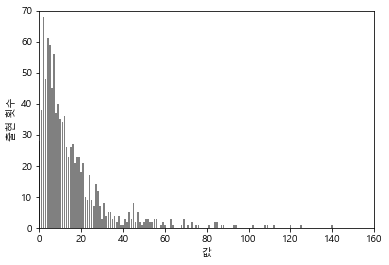

In [56]:
plt.xlim(0, 160)
plt.ylim(0, 70)
bins = np.bincount(X[:, 0])

plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel("출현 횟수")
plt.xlabel("값")
plt.show()

In [57]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("테스트 점수 : {:.3f}".format(score))

테스트 점수 : 0.622


비교적 낮은 R^2점수가 나온것으로 보아 Ridge는 제대로 모델링하지 못했다.
하지만 로그 스테일로 변환하면 도움이 된다.
데이터에 0이 있으면 log함수를 적용할 수 없으므로 log(X+1)을 사용한다.

In [58]:
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

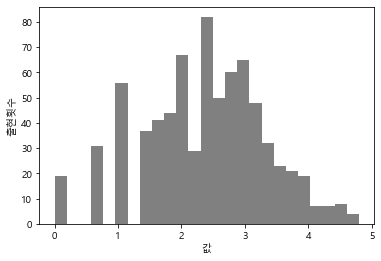

In [61]:
plt.hist(X_train_log[:, 0], bins=25, color='gray')
plt.ylabel("출현횟수")
plt.xlabel("값")
plt.show()

In [60]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("테스트 점수 : {:.3f}".format(score))

테스트 점수 : 0.875


테스트 성능이 좋아짐을 확인하였다.

이렇게 구간분할, 다항식, log 적용등 여러 변환을 적용해보았다.
데이터 셋과 모델의 조합에 최적인 변환을 찾기란 예술에 가까운 일이다.

이 예에서는 모든 특성이 같은 속성을 가지고 있다.
하지만 실제로 이런 경우는 드물며,  일부  특성만 변환하거나 특성마다 모두 다르게 변환하기도 한다.

앞서 언급한대로 이런 변환은 트리기반 모델에서는 불필요하지만, 선형모델에서는 필수이다.
이전 예에서 보았듯이 구간 분할, 다항식, 상호작용은 데이터가 주어진 상황에서 모델의 성능에 큰 영향을 줄 수 있다.
특별히 선형 모델이나 나이브 베이즈 모델같은 덜 복잡한 모델일 경우에다.

반면에 트리기반 모델은 스스로 중요한 상호작용을 찾아낼 수 있고 대부분의 경우 데이터를 명시적으로 변환하지 않아도 된다.
SVM, 최근접 이웃, 신경망 같은 모델은 선형보다는 영향이 뚜렷하진 않는다.

< 특성 자동 선택 >

새로운 특성을 만드는 방법이 많으므로 데이터의 차원이 원본 특성의 수 이상으로 증가하기 쉽다.
(이전 포스팅에서 보았듯이 특성의 합, 특성의 곱 등을 추가해보았었다.)

그러나 특성이 추가되면 모델은 더 복잡해지고 과대적합될 가능성도 높아진다.

보통 새로운 특성을 추가할 때나 고차원 데이터셋을 사용할 때 가장 유용한 특성만 선택하고 나머지는 무시하여 특성의 수를 줄이는 것이 좋다.

하지만 어떤 특성이 좋은이 어떻게 알수 있을까?

이를 위한 전략으로 일변량 통계, 모델 기반 선택, 반복적 선택이 있다.
이 세가지방법은 모두 지도 학습 방법이므로 최적값을 찾기위해 타깃값이 필요하다.

< 1. 일변량 통계 >

개개의 특성과 타깃 사이에 중요한 통계적 관계가 있는지를 계산한다.
그런다음 깊게 관련되어있다고 판단되는 특성을 선택한다.
분류에서는 분산분석이라고도 한다.

이 방법의 핵심 요소는 각 특성이 독립적으로 평가된다는 점이다.
일변량 분석은 계산이 빠르고 평가를 ㅜ이해 모델을 만들 필요가 없다.

scikit-learn에서 일변량 분석으로 특성을 선택하려면 분류에서는 f_classif(기본값)를, 회귀에서는 f_regression 을 보통 선택하여 테스트하고, 계산한 p-value에 기초하여 특성을 제외하는 방식을 선택한다.

이런 방식들은 매우 높은 p-value값을 가진(타깃값과 연관성이 작을 것 같다는 의미) 특성을 제외할 수 있도록 임계값을 조정하는 매개변수를 사용한다.

임계값을 계산하는 방법은 각각 다르며, 가장 간단한 SelectKBest는 고정된 K개의 특성을 선택하고 SelectPercentile은 지정된 비율만큼 특성을 선택한다.

cancer 데이터셋에 노이즈 데이터를 추가하여 적용해보자.
특정 선택이 이 의미없는 노이즈 특성을 식별하여 제거하는지 확인하자.

In [68]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectPercentile,f_classif

cancer = load_breast_cancer()

In [78]:
# 고정된 난수 발생
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))

# 데이터에 노이즈 특성 추가
# 처음 30 개는 원본이고 다음 50개는 노이즈로 구성
X_w_noise = np.hstack([cancer.data, noise])
X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target,
                                                    random_state=0, test_size=.5)
# f_classif(기본값)와 StandardScaler를 사용해 특성의 50%를 선택 
# StandardScaler를 사용해 각 틍성의 분산이 1이 되도록 스케일 조정
select=SelectPercentile(score_func=f_classif,percentile=50)
select.fit(X_train,y_train)
#훈련세트에 적용
X_train_selected = select.transform(X_train)
print("X_train.shape: {} ".format(X_train.shape))
print("X_train_selected.shape: {} ".format(X_train_selected.shape))

X_train.shape: (284, 80) 
X_train_selected.shape: (284, 40) 


[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


C:\Users\A\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\A\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


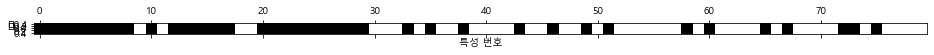

In [79]:
import matplotlib.pyplot as plt
mask = select.get_support()
print(mask)
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("특성 번호")
plt.show()

마스킹된 그래프에서 볼 수 있듯이 선택된 특성은 대부분 원본 특성이고 노이즈 특성이 거의 모두 제거되었다.
그러나 원본 특성이 완벽하게 복원된 것은 아니다.
전체 특성을 이용했을 때와 선택된 특성만 사용했을 때 성능을 비교해보자.

In [82]:
from sklearn.linear_model import LogisticRegression
# 테스트 데이터 변환
X_test_selected = select.transform(X_test) 
lr = LogisticRegression(solver="liblinear")
lr.fit(X_train, y_train)
print("전체 특성을 사용한 점수: {:.3f}".format(lr.score(X_test, y_test)))
lr.fit(X_train_selected, y_train)
print("전체 특성을 사용한 점수: {:.3f}".format(lr.score(X_test_selected, y_test)))

전체 특성을 사용한 점수: 0.930
전체 특성을 사용한 점수: 0.940


이 경우에서는 일부 원본 특성이 없더라도 노이즈 특성을 제거한 쪽의 성능이 더 높다.

애 예는 인위적으로 간단하게 만들어진 예제이고, 실제 데이터에서는 엇갈리는 경우도 많다

하지만 너무 많은 특성 때문에 모델을 만들기가 현실적으로 어려울 때 일변량 분석을 사용하여 특성을 선택하면 큰 도움이 될 수있다.

<2. 모델 기반 특성 선택>

모델 기반 특성 선택은 지도 학습 머신러닝 모델을 사용하여 특성의 중요도를 평가해서 가장 중요한 특성들만 선택한다.

특성 선택에 사용하는 지도 학습 모델은 각 특성의 중요도가 담겨 있는 feature_importances_ 속성을 제공한다.

선형 모델 계수의 절댓값도 특성의 중요도를 재는 데 사용할 수 있다.

L1규제를 사용한 선형 모델은 일부 특성의 계수만 학습하는것을 확인하였다.
이를 그 모델 자체를 위해 특성이 선택된다고 생각할 수 있지만, 다른 모델의 특성 선택을 위해 전처리 단계로 사용할 수도 있다.

일변량 분석돠는 반대로 모델 기반 특성 선택은 한 번에 모든 특성을 고려하므로 상호작용 부분을 반영할 수 잇다.

모델 기반의 특성은 SelectFromModel에 구현되어있다.

# 모델 기반 특성 선택
SelectFromModel은 중요도가 지정한 임계치보다 큰 모든 특성을 선택한다.

일변량 분석으로 선택한 특성과 결과를 비교하기 위해 절반 가량의 특성이 선택될 수 있도록 중간값을 임계치로 사용하자.

트리 100개로 만든 랜덤 포레스트 분류기를 사용해 특성 중요도를 계산한다.

In [85]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble.forest import RandomForestClassifier
select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42),
                         threshold="median")

In [87]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape : {}".format(X_train.shape))
print("X_train_l1.shape : {}".format(X_train_l1.shape))

X_train.shape : (284, 80)
X_train_l1.shape : (284, 40)


[ True  True  True  True  True  True  True  True  True  True  True False
  True  True False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False  True False False  True False
 False False False False  True False False  True False  True  True False
 False False  True False False  True  True False False False False False
 False  True False False False False False False False  True False False
 False  True False False False False False False]


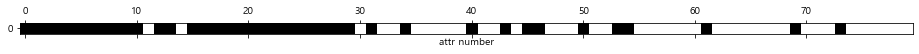

In [93]:
mask = select.get_support()
print(mask)
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("attr number")
plt.yticks([0])
plt.show()

이번에는 두 개를 제외한 모든 원본 특성이 선택되었다.
특성을 40개 선택하도록 지정했으므로 일부 노이즈도 포함되었을 것이다.

In [95]:
X_test_l1 = select.transform(X_test)
score = LogisticRegression(solver="liblinear").fit(
    X_train_l1, y_train).score(X_test_l1, y_test)
print("테스트 점수 : {:.3f}".format(score))

테스트 점수 : 0.951


특성 선택이 더 잘되었으므로 성능도 조금 향상 되었다.

<3. 반복적 특성 선택>

일변량 분석에서는 모델을 사용하지 않았고, 
모델 기반 선택에서는 하나의 모델을 사용해 특성을 선택했다.

반복적 특성 선택에서는 특성의 수가 각기 다른 일련의 모델이 만들어진다.

기본적으로 두가지 방법이 있다. 
1. 특성을 하나도 선택하지 않은 상태로 시작해서 어떤 종료 조건에 도달할 때까지 하나씩 추가하는 방법.
2. 모든 특성을 가지고 시작해서 어떤 종료 조건이 될 때까지 특성을 하나씩 제거해가는 방법

이 일련의 모델이 만들어지기 때문에 이 방법은 앞서 소개한 방법들보다 계산 비용이 훨씬 많이 든다.

재귀적 특성 제거(RFE recursive feature elimination)가 이런 방법의 하나이다.

이 방법은 모든 특성으로 시작해서 모델을 만들고 특성 중요도가 가장 낮은 특성을 제거한다.
그런다음 제거한 특성을 빼고 나머지 특성 전체로 새로운 모델을 만든다.

이런 식으로 미리 정의한 특성 개수가 남을 때까지 계속 한다.

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True  True  True
  True  True  True  True  True  True False  True False False False False
 False False False False False False False False False False False  True
  True False  True False False  True  True False False False  True False
 False False False False False  True False  True False False False False
 False  True False False False  True False False]


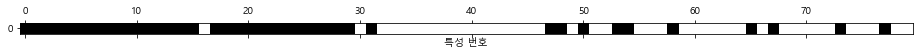

In [97]:
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=40)
select.fit(X_train, y_train)
mask = select.get_support()
print(mask)
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("특성 번호")
plt.yticks([0])
plt.show()

In [100]:
from sklearn.linear_model import LogisticRegression
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test) 
lr = LogisticRegression(solver="liblinear").fit(X_train_rfe, y_train)
print("테스트 점수: {:.3f}".format(lr.score(X_test_rfe, y_test)))

테스트 점수: 0.951


RFE 안에 있는 랜덤 포레스트의 성능이 2번째 로지스틱회귀의 성능과 같게 나왔다.

다른말로 하면, 특성 선택이 제대로 되면,선형모델의 성능은 랜덤 포레스트와 견줄만하다.

머신러닝 알고리즘에 어떤 입력값을 넣을지 확인이 안선다면 이러한 특성 자동 선택이 도움될 수 있다.

또한 예측 속도를 높이거나 해석하기 쉬운 모델을 만드는데 필요한 만큼의 특성의 수를 줄이는 데도 효과적이다.

< 특성 공학 - 전문가 지식 활용 >

특성 공학은 특정한 애플리케이션을 위해 전문가의 지식을 사용할 수 있는 중요한 영역이다.

많은 경우 머신러닝의 목적은 전문가가 설계하는 규칙을 만들기 않기 위해서지만, 그렇다고 그 분야의 전문 지식이 무시된다는 뜻은 아니다.


여행사를 위해 항공료를 예측해야한다고 가정하자.
날짜, 항공사, 출발지, 도착지와 함께 가격을 기록할 수 있을것이다.
이 데이터로부터 머신러닝 모델을 만들 수 있다.

그러나 성수기나 공휴일 근처에서는 항공료가 훨씬 비싸진다.
크리스마스같은 일부 공휴일은 날까자 고정되어있지만 음력 공휴일이나 방학, 대체휴일처럼 기관이 지정하기도 한다.
이런 이벤트들은 데이터가 날짜를 사용해서만 기록되어서는 학습될 수 없다.

그러나 공휴일과 방학 전후의 비행 스케줄이 기록된 특성을 추가하는 일은 어렵지 않다.
이런 식으로 그 작업에 내재된 사전 지식이 특성으로 추가될 수 있다면, 머신러닝 알고리즘에 도움이 된다.

특성이 추가된다고 머신러닝 알고리즘이 반드시 그 특성을 사용하는 것은 아니다.
예를 들어 공휴일 정보가 항공료 도움이 안된다고 판단하더라도, 이 정보를 데이터에 추가하는것이 문제 되지않는다.

< 앤디 집 앞의 자전거가 대여 가능한지 예측 작업 >

뉴욕에서 시티바이크는 회원 가입 시스템과 함꼐 자전거 대여소를 운영한다.
대여소는 도시 전체에 퍼져 있어서 여기저기 돌아다니기에 편리한 이동수단이다.
자전거 대여 데이터는 익명으로 공개되어있다.

[문제] 특정 날짜와 시간에 앤디 집앞에 있는 자전거를 사람들이 얼마나 대여할 것인지를 예측하자.

이 대여소에 대한 데이터를 pandas의 DataFrame으로 읽어 들인다.
그런다음 세 시간 간격으로 데이터를 다시 나누어 하루 동안의 주요 경향을 보자.

In [106]:
import mglearn
citibike = mglearn.datasets.load_citibike()

In [107]:
print("시티 바이크 데이터 : \n{}".format(citibike.head()))

시티 바이크 데이터 : 
starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64


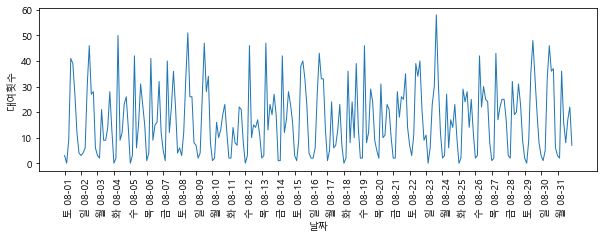

In [111]:
plt.figure(figsize=(10, 3))
xticks = pd.date_range(start=citibike.index.min(), end=citibike.index.max(), freq='D')
week = ["일", "월", "화", "수", "목", "금", "토"]
xticks_name = [week[int(w)] + d for w, d in zip(xticks.strftime("%w"), xticks.strftime(" %m-%d"))]
plt.xticks(xticks, xticks_name, rotation=90, ha='left')
plt.plot(citibike, linewidth=1)
plt.xlabel("날짜")
plt.ylabel("대여횟수")
plt.show()

데이터를 보면 24시간 간격으로 낮과 밤을 확실히 구분할 수 있다.
주중과 주말의 패턴도 꽤 잘 보인다.

이와 같은 시계열 데이터를 이용한 예측 작업은 과거 데이터에서 학습하여 미래를 예측하는 방식을 사용한다.

즉 데이터를 훈련 세트와 테스트 세트로 나눌 때 어떤 날짜까지의 모든 데이터를 훈련 세트로 하고, 그 날짜 이후의 모든 데이터를 테스트 세트로 사용한다.


이 문제에서는 23일 치 184개 데이터 포인트를 훈련 세트로 사용하고, 남은 8일 치 64개 데이터 포인트를 데스트 세트로 사용하자.

우선 컴퓨터에서 날짜를 저장하는 일반적인 방법은 Unix time이므로, 날짜와 시간을 하나의 숫자로 표현한 특성을 사용하자.

데이터를 훈련 세트와 테스트 세트로 나눠 모델을 만들고 결과를 그려보자.

In [115]:
y = citibike.values
# POSIX시간을 10**9fh sksndj qusghks
X = citibike.index.astype("int64").values.reshape(-1, 1)//10**9

테스트 세트 R^2 : -0.04


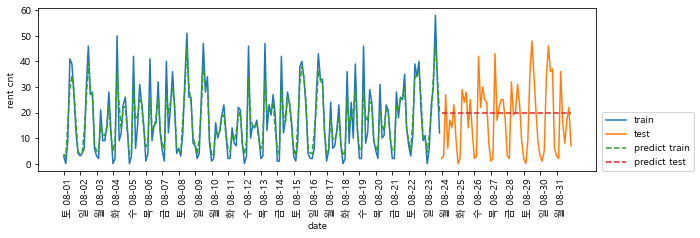

In [116]:
# 처음 184개 데이터 포인트를 훈련 세트로 사용
n_train = 184 #23일 하루에 3시간단위
def eval_on_features(features, target, regressor):
    # 훈련 세트와 테스트 세트 나누기
    X_train, X_test = features[:n_train], features[n_train:]
    y_train, y_test = target[:n_train], target[n_train:]
    regressor.fit(X_train, y_train)
    print("테스트 세트 R^2 : {:.2f}".format(regressor.score(X_test, y_test)))

    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)

    plt.figure(figsize=(10, 3))
    plt.xticks(range(0, len(X), 8), xticks_name, rotation=90, ha="left")
    plt.plot(range(n_train), y_train, label="train")
    plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label="test")
    plt.plot(range(n_train), y_pred_train, '--', label="predict train")
    plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--', label="predict test")
    plt.legend(loc=(1.01, 0))
    plt.xlabel("date")
    plt.ylabel("rent cnt")
    plt.show()
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
eval_on_features(X, y, regressor)    

랜덤 포레스트는 데이터 전처리가 거의 필요하지 않아 맨 처음 시도해보기 좋은 모델이다.
랜덤 포레스트 모델이 그렇듯이 훈련 세트의 예측은 매우 정확하다.


그런데 테스트 세트에 대해선 한 가지 값으로만 예측했다.
R^2은 -0.04로 거의 아무것도 학습되지않았다


문제는 랜덤 포레스트와 특성 사이의 조합에 있다.
테스트 세트에 있는 POSIX시간 특성의 값은 훈련세트에 있는 특성 값의 범위 밖에 있다.
즉, 테스트 세트에 있는 데이터 포인트는 훈련 세트에 있는 모든 데이터보다 뒤이 시간이다.
트리 모델인 랜덤 포레스트는 훈련 세트에 있는 특성의 범위 밖으로 외삽할 수 있는 능력이 없다.
결국 이 모델은 테스트 세트와 가장 가까이 있는 마지막 훈련 세트 데이터의 타깃값을 예측으로 사용하게 된다.

훈련 데이터의 그래프를 보면 시간과 요일이라는 두 요소가 중요한 것으로 보인다.
그럼 이 두 특성을 추가해보자.

POSIX 시간으로는 아무것도 학습되지 않으므로 이 특성은 제외한다.
먼저 시간만 사용해보자,

테스트 세트 R^2 : 0.84


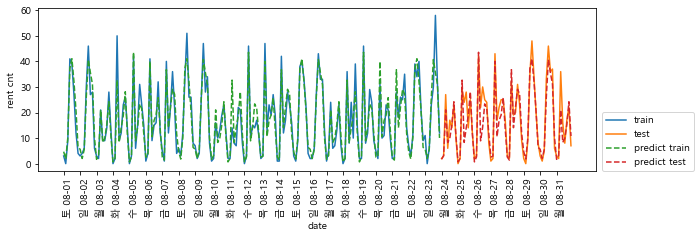

In [119]:
import numpy as np
X_hour_week = np.hstack([citibike.index.dayofweek.values.reshape(-1, 1), citibike.index.hour.values.reshape(-1, 1)])
eval_on_features(X_hour_week, y, regressor)

이제 모델은 하루의 시간과 요일에 따른 주기적인 패턴을 따르고 있다.
R^2은 0.84로 상당히 좋은 성능을 내었다.
이 모델이 학습한 것은 8월 23일까지 요일별, 시간별 평균 대여 횟수이다.

더 간단한 모델인 선형회귀(LinearRegression)를 사용해보자

테스트 세트 R^2 : 0.13


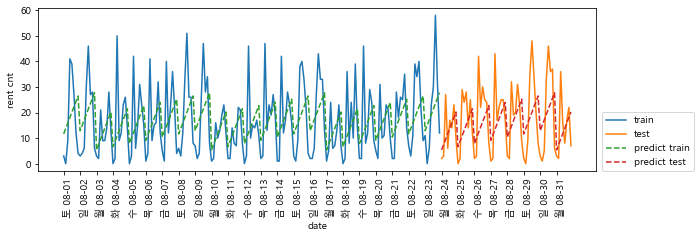

In [129]:
from sklearn.linear_model import LinearRegression
eval_on_features(X_hour_week, y, LinearRegression())

LinearRegression 성능은 훨씬 나쁘고 주기적인 패턴도 이상하다.

그 이유는 요일과 시간이 정수로 인코딩되어 있어서 연속형 변수로 해석되기 때문이다.

선형 모델은 시간을 선형 함수로만 학습할 수 있어서, 하루에서 시간이 흐를수록 대여수가 늘어나게 학습되었다.

하지만 실제 패턴은 이보다 복잡하다.
이 패턴을 잡아내기 위해 OneHotEncoder를 사용하여 정수형을 범주형 변수로 해석해보자.

테스트 세트 R^2 : 0.62


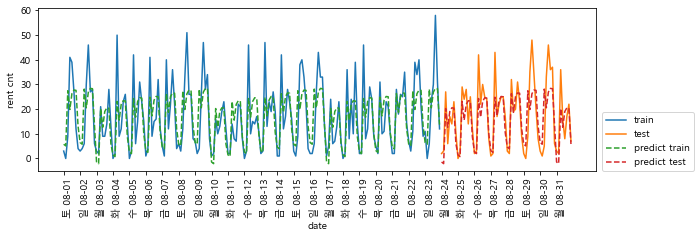

In [130]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()
eval_on_features(X_hour_week_onehot, y, Ridge())

연속형 특성일 때보다 성능이 좋아졌다.

이 선형 모델은 요일에 대해 하나의 계수를 학습하고, 시간에 대해서도 하나의 계수를 학습한다.
이 말은 시간 패턴이 모든 날에 걸쳐 공유된다는 뜻이다.

상호작용 특성을 사용하면 시간과 요일의 조합별 계수를 학습할 수 있다.

[시간과 요일의 곱을 특성으로 사용해서 만든 성형 회귀의 예측]

테스트 세트 R^2 : 0.85


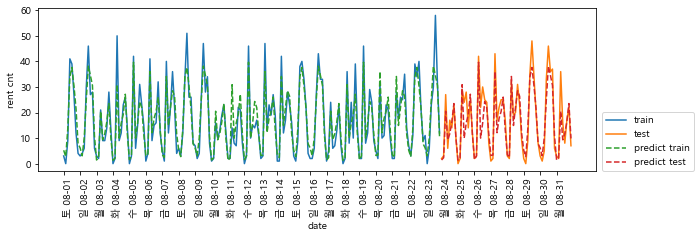

In [131]:
#상호작용 특성을 사용-시간과 요일의 조합별 계수를 학습
#시간과 요일의 곱을 특성으로 사용해서 만든 선형회귀
from sklearn.preprocessing import PolynomialFeatures
poly_transformer = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_hour_week_onehot_poly = poly_transformer.fit_transform(X_hour_week_onehot)
lr = Ridge()
eval_on_features(X_hour_week_onehot_poly, y, lr)

이런 특성 변환을 통해 모델의 성능이 랜덤 포레스트와 거의 비슷해졌다.
이 모델의 가장 큰 장점은 무엇이 학습되었는지가 명확하다는 것이다.

바로 각 날짜와 시간에 대해 하나의 계수를 학습했었다.

랜덤 포레스트와는 달리 이 모델이 학습한 계수를 그래프로 나타낼 수 있다.
1. 시간과 요일의 특성을 짓는다.
2. get_feature_names 메서드를 사용해 PolynomialFeatures로 추출한 모든 상호작용 특성에 이름을 달아준다.
3. 계수가 0이 아닌 특성만 선택한다.

[시간과 요일의 곱을 사용한 선형 모델의 계수]

Text(0, 0.5, 'coef size')

C:\Users\A\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\A\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


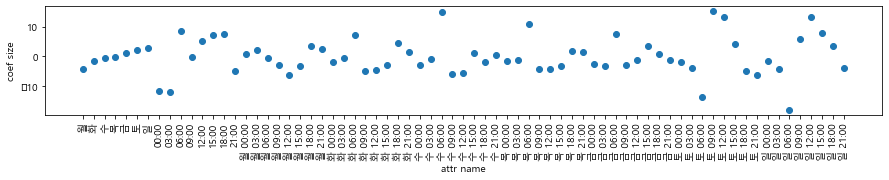

In [134]:
hour = ["%02d:00" % i for i in range(0, 24, 3)]
day = ["월", "화", "수", "목", "금", "토", "일"]

features =  day + hour

features_poly = poly_transformer.get_feature_names(features)
features_nonzero = np.array(features_poly)[lr.coef_ != 0]
coef_nonzero = lr.coef_[lr.coef_ != 0]

plt.figure(figsize=(15, 2))
plt.plot(coef_nonzero, 'o')
plt.xticks(np.arange(len(coef_nonzero)), features_nonzero, rotation=90)
plt.xlabel("attr name")
plt.ylabel("coef size")

In [ ]:
https://www.kaggle.com/c/bike-sharing-demand/data
자전거 데이터    

In [ ]:
pd.read_csv()